# Программирование и анализ данных

*Алла Тамбовцева*

## Семинар 7 по теме: введение в датафреймы Pandas

#### Задание 1

Загрузите данные из файла `TED.csv` в датафрейм `ted`, учитывая, что в качестве разделителя столбцов используется не запятая, а точка с запятой. 

In [1]:
import pandas as pd
ted = pd.read_csv("TED.csv", sep=";")

#### Задание 2

Посмотрите на сводную информацию по датафрейму `ted`. Сколько в нем строк и столбцов? Данные каких типов содержит этот датафрейм? Есть ли в нем пропущенные значения? 

In [2]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 7 columns):
comments        2550 non-null int64
description     2550 non-null object
duration        2550 non-null object
event           2550 non-null object
main_speaker    2550 non-null object
occupation      2544 non-null object
title           2550 non-null object
dtypes: int64(1), object(6)
memory usage: 139.6+ KB


2550 строк, 7 столбцов. Один целочисленный столбец (`comments`), остальные строковые. Проблема: столбец `duration` почему-то тоже строковый, хотя должен быть числовым. Попробуем принудительно привести его к типу `integer` и посмотрим, в чем проблема:

In [4]:
ted["duration"].astype(int)

Если прогоним строку выше, увидим, что в этом столбце в одной из ячеек есть скобка, поэтому весь столбец читается как строковый. Если бы мы дальше работали с этим столбцом, мы бы удалили ячейку с скобкой и превратили оставшиеся валидные значения в числа, используя метод `.astype()`.

#### Задание 3

Определите число уникальных значений в столбце `event`.

In [5]:
# метод .unique() возвращает массив array
# запрашиваем число элементов в нем – атрибут size

ted["event"].unique().size 

356

#### Задание 4

Выберите из датафрейма `ted` строки, которые соответствуют мероприятиям 2017 года (столбец `event`), и сохраните их в датафрейм `ted17`.

In [7]:
ted17 = ted[ted["event"].str.contains("2017")]

#### Задание 5

Посчитайте среднее число комментариев к выступлениям, данные по которым сохранены в `ted17`. Сохраните его в переменную `comm_mean`.

In [11]:
comm_mean = ted17["comments"].mean() 
comm_mean

45.92857142857143

#### Задание 6

Сохраните в датафрейм `final` только те строки из `ted17`, которые соответствуют выступлениям с числом комментариев выше среднего.

In [12]:
final = ted17[ted17["comments"] > comm_mean]

#### Задание 7

Выберите столбец `description` в датафрейме `final`. Извлеките из него все значения – описания выступлений (атрибут `.values`) и склейте все описания в одну строку `text`. Приведите все содержимое строки `text` к нижнему регистру и сохраните изменения. 

In [13]:
text = " ".join(final["description"].values)
text = text.lower()

#### Задание 8

Установите библиотеку `wordcloud` для построения облаков слов:

    pip install wordcloud
        
Импотрируйте оттуда необходимые объекты (функция для построения облака и список стоп-слов).

    from wordcloud import WordCloud, STOPWORDS

Если устанавливаем через Jupyter, то перед `pip` нужно добавить `!`:

In [ ]:
!pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

#### Задание 9

Импортируйте модуль `pyplot` из библиотеки `matplotlib` для графики:

    import matplotlib.pyplot as plt
    
Запустите строку `%matplotlib inline`, чтобы графики строились в Jupyter Notebook, в ячейке сразу после кода. 

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

#### Задание 10

Постройте облако слов для текстов, который ранее были склеены в строку `text`:

    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

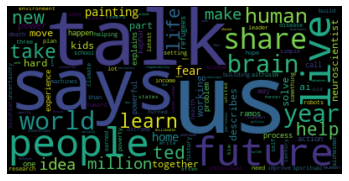

In [17]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Задание 11

Измените цвет фона в облаке слов на белый (аргумент `background_color` в функции `WordCloud()`), сделайте максимальное число слов в облаке равным 50 (аргумент `max_words` там же). Сохраните полученное облако слов в файл:

    wordcloud.to_file("cloud-1.png")

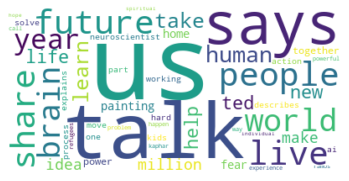

In [19]:
wordcloud = WordCloud(background_color = "white", 
                     max_words = 50).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
wordcloud.to_file("cloud-1.png") 

### Дополнение 1
    
Скорректируем облако слов – учтем стоп-слова, добавив к импортированному множеству `STOPWORDS` часто встречающиеся в `text` слова, которые не несут большой смысловой нагрузки (раз текст про *TED takls*, то, например, слово *talk* не отражает смысл текста):  

In [23]:
# обновляем множество
STOPWORDS.update({"talk", "us", "take", "make", "says"})

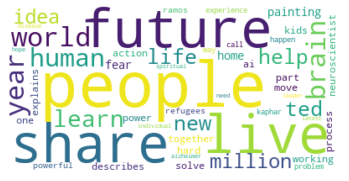

In [24]:
# указываем эти STOPWORDS в функции WordCloud

wordcloud = WordCloud(background_color = "white", 
                     max_words = 50, 
                     stopwords = STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Можем изменить цветовую палитру (см. список палитр `matplotlib` [здесь](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)):

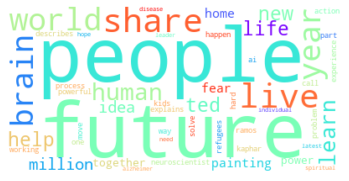

In [26]:
wordcloud = WordCloud(background_color = "white", 
                     max_words = 50, 
                     stopwords = STOPWORDS, 
                     colormap="rainbow").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Дополнение 2

*Идея Артура Хисматулина: взять картинку с логотипом TED и по аналогии с [тьюториалом](https://www.datacamp.com/community/tutorials/wordcloud-python) использовать ее в качестве шаблона для облака.* 

Реализуем. Скачаем [картинку](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.ted.com%2F&psig=AOvVaw2Nb0Y9RZP8DZpeAVByV_gm&ust=1582644442791000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKi1j5PA6ucCFQAAAAAdAAAAABAD).

Сначала импортируем все необходимые библиотеки и функции (для создания готового примера импортируем функции, которые уже импортировали для семинара, повторно): 

* `numpy` – для обработки массива (изображение будет распознаваться и считываться как массив);
* `PIL` – для загрузки и обработки изображений;
* `ImageColorGenerator` – для выбора палитры из цветов, какие есть в изображении;

In [28]:
import numpy as np
from PIL import Image  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

Создадим «маску» – шаблон для фона и формы облака. Она задана массивом из чисел, где каждое число соответствует оттенок цвета, встречающийся в картинке:

In [30]:
ted_mask = np.array(Image.open("ted-logo-fb.png"))

Теперь подставим эту «маску» в функцию `WordCloud()` 

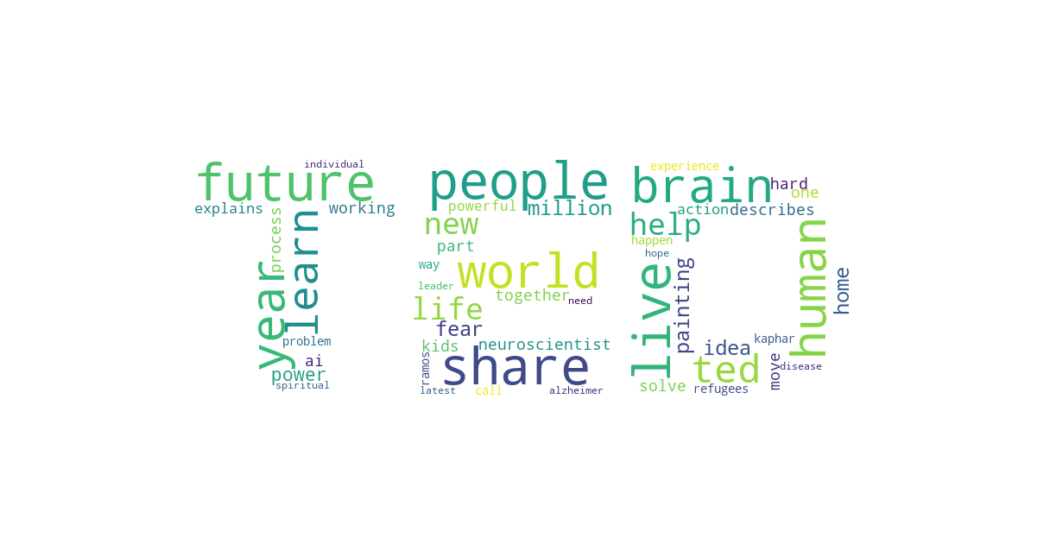

In [32]:
wc = WordCloud(background_color="white", 
               max_words=50, 
               mask=ted_mask,
               stopwords=STOPWORDS)
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Если хотим выбрать цветовую палитру, соответствующую цветам самого изображения (в нашем случае оттенки красного), перед выводом изображения создадим набор цветов через `ImageColorGenerator()` и укажем его в `.imshow()`:

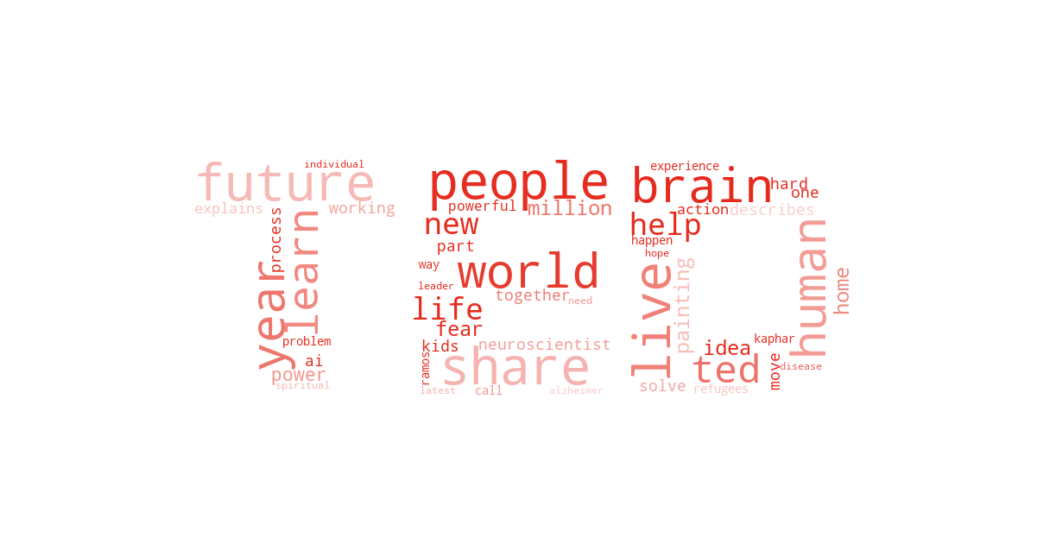

In [34]:
image_colors = ImageColorGenerator(ted_mask)

plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation="bilinear")
plt.axis("off")
plt.show()

Можем добавить границы каждой буквы, выбрав их цвет (`contour_color`) и ширину (`contour_width`).

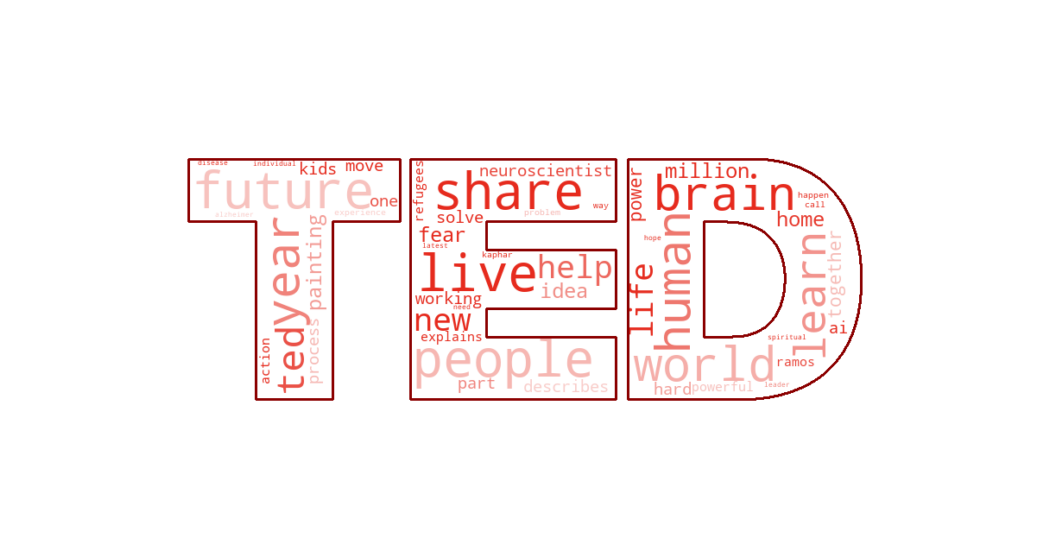

In [37]:
wc = WordCloud(background_color="white", 
               max_words=50, 
               mask=ted_mask,
               stopwords=STOPWORDS,
               contour_width=3, 
               contour_color='darkred')
wc.generate(text)

image_colors = ImageColorGenerator(ted_mask)

plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation="bilinear")
plt.axis("off")
plt.show()

Порядок! Выгрузим в файл (строка с `savefig()`):

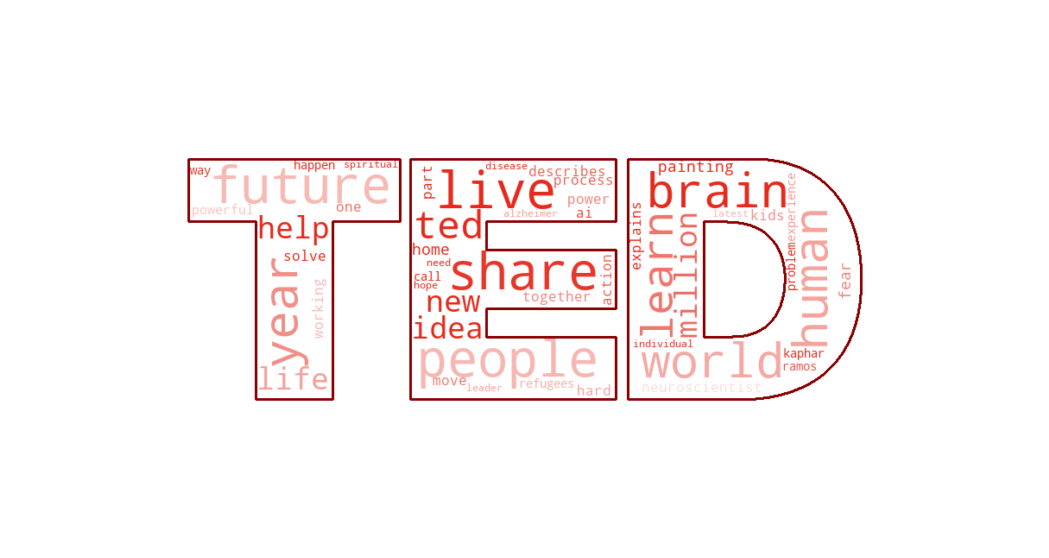

In [39]:
wc = WordCloud(background_color="white", 
               max_words=50, 
               mask=ted_mask,
               stopwords=STOPWORDS,
               contour_width=3, 
               contour_color='darkred')
wc.generate(text)

image_colors = ImageColorGenerator(ted_mask)

plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation="bilinear")
plt.axis("off")
plt.savefig("ted-cloud.png")